# GDP and population

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `dataproject.py` file includes a function which will be used multiple times in this notebook.

Imports and set magics:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib_venn import venn2 # install with pip install matplotlib-venn

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import dataproject

# Read and clean data

## GDP data

**Read the GDP data** in ``GDP per cap.xlsx`` and **clean it** removing and renaming columns:

In [3]:
# a. load
GDP_per_capita = pd.read_excel('GDP per cap.xlsx', skiprows=1)

# b. drop columns
drop_these = ['Indicator', 'Units', 'Scale', 'Measurement', 'Source',	'Seasonally adjusted',	'Base year price',	'Base year index',	'Historical end year',	'Historical end quarter',	'Date of last update',	'Source details',	'Additional source details',	'Indicator code',
]
GDP_per_capita.drop(drop_these, axis=1, inplace=True)

# c. rename columns
myDict = {}
for i in range(1990, 2020+1): # range goes from 1990 to 2020
    myDict[str(i)] = f'GDP{i}' 
GDP_per_capita.rename(columns = myDict, inplace=True)


The dataset now looks like this:

In [4]:
GDP_per_capita.head(50)
#GDP_per_capita.shape
#GDP_per_capita.info()

,Location,GDP1990,GDP1991,GDP1992,GDP1993,GDP1994,GDP1995,GDP1996,GDP1997,GDP1998,...,GDP2012,GDP2013,GDP2014,GDP2015,GDP2016,GDP2017,GDP2018,GDP2019,GDP2020,Location code
0,Algeria,3124.000000,3011.500000,2994.490,2867.200,2783.160,2834.270,2899.200,2884.120,2986.060,...,4012.360,4042.920,4112.080,4177.890,4224.040,4192.340,4168.390,4125.950,4091.970,DZA
1,Angola,2985.760000,2916.760000,2657.840,1955.860,1919.130,2137.130,2349.840,2440.960,2474.280,...,4167.120,4220.960,4272.460,4166.980,3924.620,3790.790,3587.610,3436.840,3341.360,AGO
2,Bahrain,19243.900000,20806.800000,21644.700,23835.000,23184.900,23470.600,23562.800,22389.700,21122.300,...,22782.000,23168.500,23047.700,23362.000,23846.900,24484.600,24522.800,24499.800,24129.500,BHR
3,Benin,577.263000,581.677000,578.404,591.102,582.734,597.940,604.479,620.080,625.848,...,732.466,763.521,789.739,784.248,793.136,816.669,848.678,874.363,876.646,BEN
4,Botswana,3681.990000,3838.590000,3842.720,3816.790,3858.860,4008.680,4127.450,4339.160,4259.280,...,6214.980,6843.270,7037.260,6811.820,6975.040,7029.720,7184.330,7264.360,7351.990,BWA
5,Burkina Faso,307.527000,326.571000,318.619,320.855,316.316,325.344,351.331,363.269,379.042,...,548.527,563.253,570.475,575.524,592.057,611.534,635.136,654.304,672.859,BFA
6,Burundi,374.099000,389.348000,387.312,354.046,336.038,303.348,274.896,272.265,282.056,...,304.833,313.134,317.367,295.761,283.070,274.017,267.215,263.391,260.680,BDI
7,Cameroon,1236.970000,1154.780000,1086.610,972.069,965.187,971.581,987.039,1011.620,1029.930,...,1220.780,1252.260,1290.600,1327.450,1350.070,1364.230,1382.510,1399.920,1422.590,CMR
8,Cape Verde,1372.010000,1352.620000,1356.080,1416.920,1476.190,1547.050,1615.600,1702.840,1808.510,...,3083.670,3069.460,3049.980,3043.010,3148.710,3236.990,3341.500,3451.870,3556.890,CPV
9,Central African Republic,587.562000,579.671000,556.354,538.597,550.420,563.043,507.078,524.759,535.538,...,549.059,346.654,348.986,363.377,376.116,387.416,397.498,408.366,420.581,CAF


**Remove all rows which do not have GDP data for all periods**:

In [5]:
GDP_per_capita = GDP_per_capita.dropna()
GDP_per_capita.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189 entries, 0 to 202
Data columns (total 33 columns):
Location         189 non-null object
GDP1990          189 non-null float64
GDP1991          189 non-null float64
GDP1992          189 non-null float64
GDP1993          189 non-null float64
GDP1994          189 non-null float64
GDP1995          189 non-null float64
GDP1996          189 non-null float64
GDP1997          189 non-null float64
GDP1998          189 non-null float64
GDP1999          189 non-null float64
GDP2000          189 non-null float64
GDP2001          189 non-null float64
GDP2002          189 non-null float64
GDP2003          189 non-null float64
GDP2004          189 non-null float64
GDP2005          189 non-null float64
GDP2006          189 non-null float64
GDP2007          189 non-null float64
GDP2008          189 non-null float64
GDP2009          189 non-null float64
GDP2010          189 non-null float64
GDP2011          189 non-null float64
GDP2012          189 n

**Convert the dataset to long format**:

In [6]:


# a. convert to long
GDP_per_capita_long = pd.wide_to_long(GDP_per_capita, stubnames='GDP', i='Location', j='Year').reset_index()

# c. show
GDP_per_capita_long.head(10)

,Location,Year,Location code,GDP
0,Algeria,1990,DZA,3124.000
1,Angola,1990,AGO,2985.760
2,Bahrain,1990,BHR,19243.900
3,Benin,1990,BEN,577.263
4,Botswana,1990,BWA,3681.990
5,Burkina Faso,1990,BFA,307.527
6,Burundi,1990,BDI,374.099
7,Cameroon,1990,CMR,1236.970
8,Cape Verde,1990,CPV,1372.010
9,Central African Republic,1990,CAF,587.562


## Population data

**Read the income data** in ``POP.xlsx`` and **clean it**:

In [7]:
# a. load
pop = pd.read_excel('POP.xlsx', skiprows=1)


# b. drop columns
drop_these = ['Indicator', 'Units', 'Scale', 'Measurement', 'Source',	'Seasonally adjusted',	'Base year price',	'Base year index',	'Historical end year',	'Historical end quarter',	'Date of last update',	'Source details',	'Additional source details',	'Indicator code']
pop.drop(drop_these, axis=1, inplace=True)

# c. rename columns
myDict_pop = {}
for i in range(1990, 2020+1): # range goes from 1990 to 2020
    myDict_pop[str(i)] = f'pop{i}' 
pop.rename(columns = myDict_pop, inplace=True)
pop.head(10)

# d. drop na
pop = pop.dropna()


# e. convert to long
pop_long = pd.wide_to_long(pop, stubnames='pop', i='Location', j='Year').reset_index()

# f. show
pop_long.head(10)

,Location,Year,Location code,pop
0,Algeria,1990,DZA,25758.900
1,Angola,1990,AGO,11848.400
2,Bahrain,1990,BHR,468.165
3,Benin,1990,BEN,4978.490
4,Botswana,1990,BWA,1286.760
5,Burkina Faso,1990,BFA,8811.030
6,Burundi,1990,BDI,5438.960
7,Cameroon,1990,CMR,11780.100
8,Cape Verde,1990,CPV,337.950
9,Central African Republic,1990,CAF,2806.730


merge data sets


In [8]:
GDP_pop = pd.merge(GDP_per_capita_long, pop_long, how='inner',on=['Location code', 'Year'])
drop_duplicate_location = ['Location_y']
GDP_pop.drop(drop_duplicate_location, axis=1, inplace=True)
GDP_pop.rename(columns = {'Location_x':'Location'}, inplace=True)
GDP_pop.head(10)

,Location,Year,Location code,GDP,pop
0,Algeria,1990,DZA,3124.000,25758.900
1,Angola,1990,AGO,2985.760,11848.400
2,Bahrain,1990,BHR,19243.900,468.165
3,Benin,1990,BEN,577.263,4978.490
4,Botswana,1990,BWA,3681.990,1286.760
5,Burkina Faso,1990,BFA,307.527,8811.030
6,Burundi,1990,BDI,374.099,5438.960
7,Cameroon,1990,CMR,1236.970,11780.100
8,Cape Verde,1990,CPV,1372.010,337.950
9,Central African Republic,1990,CAF,587.562,2806.730


> **Note:** The function ``dataproject.only_keep_municipalities()`` is used on both the employment and the income datasets.

## Explore data set

In order to be able to **explore the raw data**, we here provide an **interactive plot** to show, respectively, the employment and income level in each municipality

The **static plot** is:

In [9]:
def plot_GDP_pop(GDP,pop,dataset,Location): 
    
    if dataset == 'GDP_Per_Capita':
        df = GDP
        y = 'GDP Per Capita in USD'
    else:
        df = pop
        y = 'pop'
    
    I = df['Location'] == Location
    ax = df.loc[I,:].plot(x='Year', y=y, style='-o')

The **interactive plot** is:

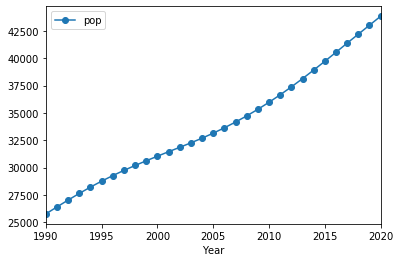

In [10]:
widgets.interact(plot_GDP_pop, 
    
    GDP = widgets.fixed(GDP_per_capita_long),
    pop = widgets.fixed(pop_long),
    dataset = widgets.Dropdown(description='Dataset', 
                               options=['GDP_per_capita','pop']),
   Location = widgets.Dropdown(description='Location', 
                                  options=GDP_per_capita_long.Location.unique())
                 
); 

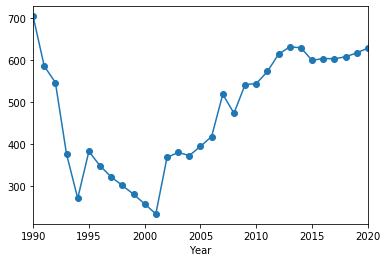

In [11]:
def plot_GDP(df, Location): 
    I = df['Location'] == Location
    ax=df.loc[I,:].plot(x='Year', y='GDP', style='-o', legend=False)
[46]
widgets.interact(plot_GDP, 
    df = widgets.fixed(GDP_per_capita_long),
    Location = widgets.Dropdown(description='Location', 
                                    options=GDP_per_capita_long.Location.unique(), 
                                    value='Afghanistan')
); 

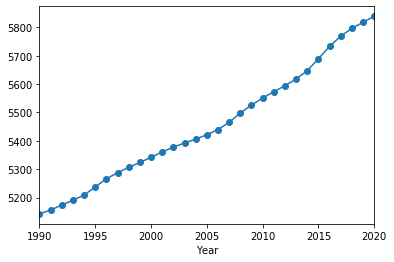

In [12]:
def plot_pop(df, Location): 
    I = df['Location'] == Location
    ax=df.loc[I,:].plot(x='Year', y='pop', style='-o', legend=False)
[46]
widgets.interact(plot_pop, 
    df = widgets.fixed(pop_long),
    Location = widgets.Dropdown(description='Location', 
                                    options=pop_long.Location.unique(), 
                                    value='Denmark')
); 

ADD SOMETHING HERE IF THE READER SHOULD KNOW THAT E.G. SOME MUNICIPALITY IS SPECIAL.

# Analysis

To get a quick overview of the data, we show some **summary statistics by year**:

In [13]:
GDP_pop.groupby('Year').agg(["mean", "max", "min"]).round(2)

#GDP_pop.describe()
GDP_pop_group4 = GDP_pop[(GDP_pop.GDP <= 1959.62) & (GDP_pop.Year == 2019)]
GDP_pop_group3 = GDP_pop[( GDP_pop.GDP >= 1959.62) & (GDP_pop.GDP <= 6404.62) & (GDP_pop.Year == 2019)]
GDP_pop_group2 = GDP_pop[( GDP_pop.GDP >= 6404.62) & (GDP_pop.GDP <= 21745.90) & (GDP_pop.Year == 2019)]
GDP_pop_group1 = GDP_pop[( GDP_pop.GDP >= 21745.90)  & (GDP_pop.Year == 2019)]
GDP_pop_group1.head(200)

,Location,Year,Location code,GDP,pop
5483,Bahrain,2019,BHR,24499.80,1414.0500
5509,Israel,2019,ISR,40654.90,8518.3100
5511,Kuwait,2019,KWT,27393.20,4199.0800
5527,Qatar,2019,QAT,60187.40,2828.9500
5528,Reunion,2019,REU,25167.40,888.9160
5543,United Arab Emirates,2019,ARE,39549.40,9764.9000
5547,Anguilla,2019,ANG,21745.90,14.8574
5550,Aruba,2019,ABW,26220.10,106.2810
5551,"Bahamas, The",2019,BHS,31209.80,389.4140
5554,Bermuda,2019,BMU,98787.40,62.5574


Joiner tal fra resterende år på vores group 1-4 

In [14]:
# group 1
join_group1 = pd.merge(GDP_pop_group1, GDP_pop, how='left',on=['Location code'])
drop_these = ['Year_x', 'GDP_x', 'pop_x', 'Location_y']
rename_these = {'Year_y':'year', 'GDP_y':'GDP', 'pop_y':'pop'}
join_group1.drop(drop_these, axis=1, inplace=True)
join_group1.rename(columns = rename_these, inplace=True)
# group 2
join_group2 = pd.merge(GDP_pop_group2, GDP_pop, how='left',on=['Location code'])
drop_these = ['Year_x', 'GDP_x', 'pop_x', 'Location_y']
rename_these = {'Year_y':'year', 'GDP_y':'GDP', 'pop_y':'pop'}
join_group2.drop(drop_these, axis=1, inplace=True)
join_group2.rename(columns = rename_these, inplace=True)
# group 3
join_group3 = pd.merge(GDP_pop_group3, GDP_pop, how='left',on=['Location code'])
drop_these = ['Year_x', 'GDP_x', 'pop_x', 'Location_y']
rename_these = {'Year_y':'year', 'GDP_y':'GDP', 'pop_y':'pop'}
join_group3.drop(drop_these, axis=1, inplace=True)
join_group3.rename(columns = rename_these, inplace=True)
# group 4
join_group4 = pd.merge(GDP_pop_group4, GDP_pop, how='left',on=['Location code'])
drop_these = ['Year_x', 'GDP_x', 'pop_x', 'Location_y']
rename_these = {'Year_y':'year', 'GDP_y':'GDP', 'pop_y':'pop'}
join_group4.drop(drop_these, axis=1, inplace=True)
join_group4.rename(columns = rename_these, inplace=True)

In [69]:
# take logs
join_group1['log_GDP'] =  np.log(join_group1['GDP'])
join_group1['log_pop'] =  np.log(join_group1['pop'])
join_group2['log_GDP'] =  np.log(join_group2['GDP'])
join_group2['log_pop'] =  np.log(join_group2['pop'])
join_group3['log_GDP'] =  np.log(join_group3['GDP'])
join_group3['log_pop'] =  np.log(join_group3['pop'])
join_group4['log_GDP'] =  np.log(join_group4['GDP'])
join_group4['log_pop'] =  np.log(join_group4['pop'])
# growth rates
join_group1['growth_GDP'] = join_group1['log_GDP'].diff(1)
join_group2['growth_GDP'] = join_group2['log_GDP'].diff(1)
join_group3['growth_GDP'] = join_group3['log_GDP'].diff(1)
join_group4['growth_GDP'] = join_group4['log_GDP'].diff(1)
# population rates
join_group1['growth_pop'] = join_group1['log_pop'].diff(1)
join_group2['growth_pop'] = join_group2['log_pop'].diff(1)
join_group3['growth_pop'] = join_group3['log_pop'].diff(1)
join_group4['growth_pop'] = join_group4['log_pop'].diff(1)
# create variable for income group
join_group1['income_group'] = str("group_1")
join_group2['income_group'] = str("group_2")
join_group3['income_group'] = str("group_3")
join_group4['income_group'] = str("group_4")





# create mean gdp growth of income groups
#join_group1['meangrowth_income_group'] = log_GDP.mean
#join_group2['meangrowth_income_group'] = log_GDP.mean
#join_group3['meangrowth_income_group'] = log_GDP.mean
#join_group4['meangrowth_income_group'] = log_GDP.mean

# merge group tables
outcome = pd.concat([join_group1, join_group2, join_group3, join_group4])
outcome.head(5000)
outcome.describe()
outcome.groupby(['income_group', 'year']).agg(["mean"]).round(2)


# graph
#plt.plot(outcome, x=Year, y=outcome.groupby(['income_group', 'year']).agg(["mean"]))
#plt.show()

outcome.groupby(['income_group', 'year']).growth_GDP.mean()

#outcome.loc[outcome[''] == 'group_1',:] .plot(x='year', y='GDP',legend=False);




<class 'pandas.core.frame.DataFrame'>
Int64Index: 1488 entries, 0 to 1487
Data columns (total 10 columns):
Location_x       1488 non-null object
Location code    1488 non-null object
year             1488 non-null int64
GDP              1488 non-null float64
pop              1488 non-null float64
log_GDP          1488 non-null float64
log_pop          1488 non-null float64
growth_GDP       1487 non-null float64
growth_pop       1487 non-null float64
income_group     1488 non-null object
dtypes: float64(6), int64(1), object(3)
memory usage: 127.9+ KB


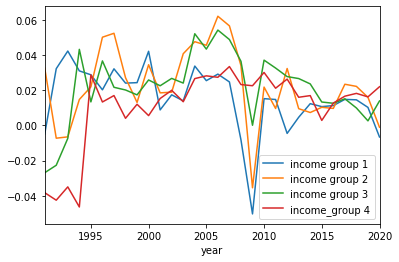

In [82]:
outcome1991 = outcome[(outcome.year > 1990) & (outcome.Location_x != "Eritrea")]
join_group11991= join_group1[join_group1.year > 1990]
join_group21991= join_group2[join_group2.year > 1990] 
join_group31991= join_group3[join_group3.year > 1990]
join_group41991= join_group4[(join_group4.year > 1990) & (join_group4.Location_x != "Eritrea")]

#outcome1991.groupby(['income_group', 'year']).growth_GDP.mean().plot()
join_group11991.groupby(["year"]).growth_GDP.mean().plot()
join_group21991.groupby(["year"]).growth_GDP.mean().plot()
join_group31991.groupby(["year"]).growth_GDP.mean().plot()
join_group41991.groupby(["year"]).growth_GDP.mean().plot().legend(["income group 1","income group 2","income group 3","income_group 4"])

 

Text(0, 0.5, 'Average growth in population')

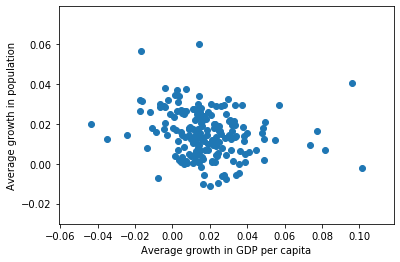

In [109]:
# Scatter plot
scatterx = outcome1991.groupby(["Location_x"]).growth_GDP.mean()
scattery = outcome1991.groupby(["Location_x"]).growth_pop.mean()


plt.scatter(scatterx, scattery)
plt.xlabel("Average growth in GDP per capita")
plt.ylabel("Average growth in population")

ADD FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

 5 grupper defineret på forskellige GDP per capita niveau. Vækstrater, Korrelationskoefficienter